In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate normal salary data
normal_salaries = np.random.normal(loc=50000, scale=15000, size=1000)

# Introduce anomalies
anomalies = np.random.uniform(low=200000, high=300000, size=10)
anomalies = np.append(anomalies, np.random.uniform(low=10000, high=20000, size=10))

# Combine normal salaries and anomalies
salaries = np.concatenate([normal_salaries, anomalies])

# Create a DataFrame
df = pd.DataFrame({'salary': salaries})

# Save to a CSV file
df.to_csv('salary.csv', index=False)

# Display the first few rows of the data
df.head()

,salary
0,57450.712295
1,47926.035482
2,59715.328072
3,72845.447846
4,46487.699379


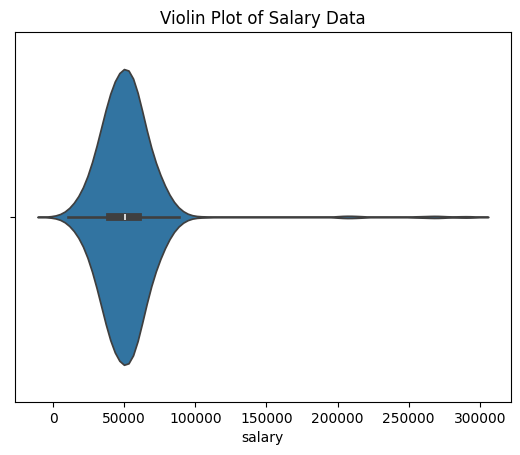

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('salary.csv')

# Violin plot to visualize salary distribution
sns.violinplot(x=df['salary'])
plt.title('Violin Plot of Salary Data')
plt.show()

In [5]:
from sklearn.ensemble import IsolationForest

# Define and fit the model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, max_features=1.0, random_state=42)
model.fit(df[['salary']])

# Predict anomalies
df['anomaly'] = model.predict(df[['salary']])
df['anomaly'] = df['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
df.head(10)

,salary,anomaly
0,57450.712295,Normal
1,47926.035482,Normal
2,59715.328072,Normal
3,72845.447846,Normal
4,46487.699379,Normal
5,46487.945646,Normal
6,73688.192233,Normal
7,61511.520937,Normal
8,42957.884211,Normal
9,58138.400654,Normal
